#  Análisis y Segmentación de Clientes de Tarjetas de Crédito

- #### Resumen del proyecto:

Este proyecto integra análisis exploratorio de datos (EDA) y técnicas de clustering para segmentar clientes de una entidad emisora de tarjetas de crédito. Utilizando Python, se identifican patrones de comportamiento financiero que permiten comprender mejor a los distintos grupos de usuarios y brindar soporte a estrategias comerciales, de fidelización y gestión del riesgo.

Forma parte de mi portfolio profesional como ingeniero consultor con especialización en análisis de datos, ingeniería y gestión de proyectos.

- #### Objetivos:
    - Realizar un análisis estadístico y visual detallado de los datos.

    - Detectar patrones de comportamiento en el uso del crédito y pagos.

    - Aplicar técnicas de clustering para identificar segmentos de clientes con características similares.

    - Generar insights que apoyen decisiones estratégicas en empresas del sector financiero o tecnológico.

- #### Fuente de datos:

Dataset:  <a href="https://www.kaggle.com/datasets/arjunbhasin2013/ccdata" target="_blank">Credit Card Dataset for Clustering</a>
- Cantidad de registros: 8.950
- Variables destacadas:
    - BALANCE: Saldo promedio mensual
    - PURCHASES: Compras totales
    - ONEOFF_PURCHASES: Compras en 1 pago
    - INSTALLMENTS_PURCHASES: Compras a plazos o cuotas
    - CREDIT_LIMIT: Límite de crédito
    - MINIMUM_PAYMENTS: Pagos mínimos realizados
    - TENURE: Antigüedad del cliente en meses
--- 

- #### Metodología:

1) Carga y descripcion de datos

2) Tratamiento de valores faltantes

3) Análisis univariado

4) Análisis bivariado y vorrelacional

5) Ingenieria de variables

6) Insights clave

7) Pipeline

8) Conclusion final - Implicaciones estratégicas


- #### Autor:
Ing. Facundo Estanislao Reta

## 1. Carga y descripcion de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

df = pd.read_csv('F:Facu\CC GENERAL.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# df.describe().T

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 2. Tratamiento de datos faltantes
    
Se identificaron valores nulos en dos columnas:

- MINIMUM_PAYMENTS: Imputado con la mediana.

- CREDIT_LIMIT: Imputado con la mediana.

In [6]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

df_model = df.copy() #Usado para el modelado de clustering

## 3. Análisis univariado
Se analizan las principales distribuciones numéricas para detectar outliers y entender la dispersión de datos, destacándose una alta asimetría positiva en *PURCHASES* y *BALANCE*.

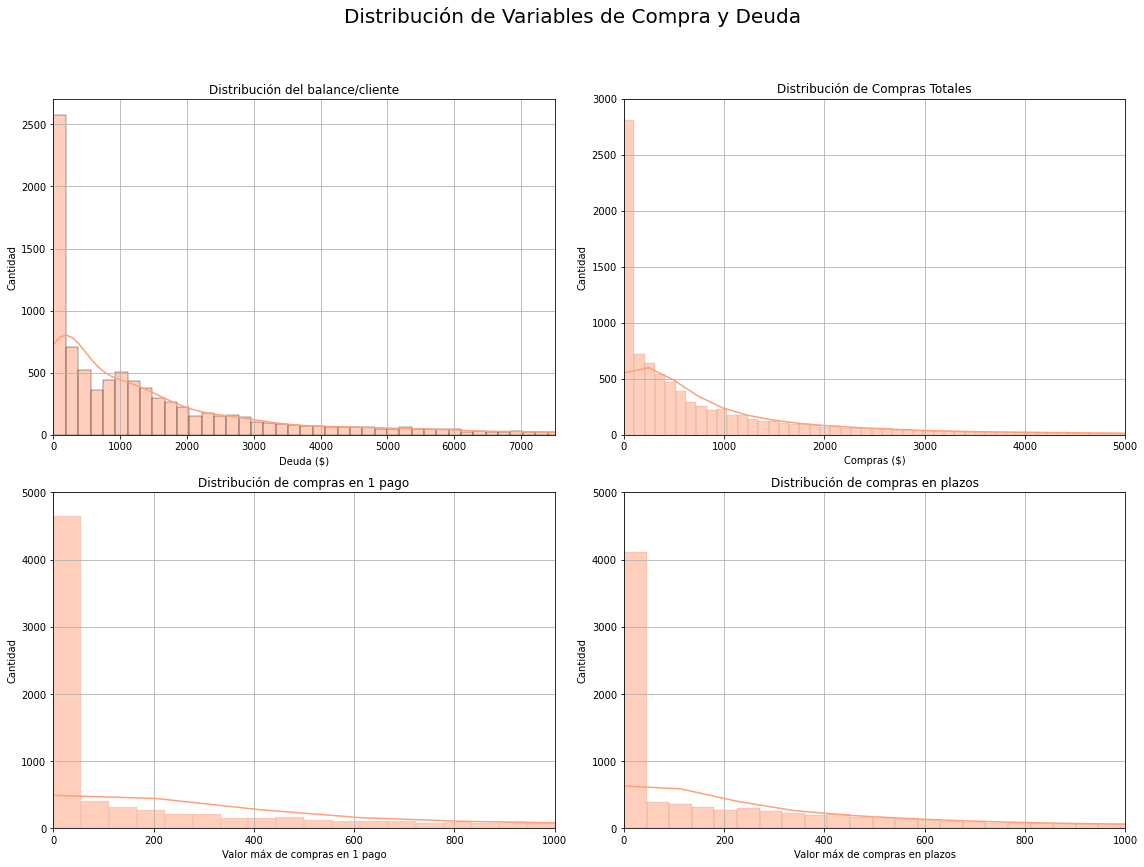

In [7]:
# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribución de Variables de Compra y Deuda', fontsize=20,y=1)

# Histograma de BALANCE
sns.histplot(df['BALANCE'], kde=True, color='Lightsalmon', ax=axs[0, 0])
axs[0, 0].set_title('Distribución del balance/cliente')
axs[0, 0].set_xlabel('Deuda ($)')
axs[0, 0].set_ylabel('Cantidad')
axs[0, 0].set_xlim(0, 7500)
axs[0, 0].grid(True)

# Histograma de PURCHASES
sns.histplot(df['PURCHASES'], kde=True, color='Lightsalmon', ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Compras Totales')
axs[0, 1].set_xlabel('Compras ($)')
axs[0, 1].set_ylabel('Cantidad')
axs[0, 1].set_xlim(0, 5000)
axs[0, 1].set_ylim(0, 3000)
axs[0, 1].grid(True)

# Histograma de ONEOFF_PURCHASES
sns.histplot(df['ONEOFF_PURCHASES'], kde=True, color='Lightsalmon', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de compras en 1 pago')
axs[1, 0].set_xlabel('Valor máx de compras en 1 pago')
axs[1, 0].set_ylabel('Cantidad')
axs[1, 0].set_xlim(0, 1000)
axs[1, 0].set_ylim(0, 5000)
axs[1, 0].grid(True)

# Histograma de INSTALLMENTS_PURCHASES
sns.histplot(df['INSTALLMENTS_PURCHASES'], kde=True, color='Lightsalmon', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de compras en plazos')
axs[1, 1].set_xlabel('Valor máx de compras en plazos')
axs[1, 1].set_ylabel('Cantidad')
axs[1, 1].set_xlim(0, 1000)
axs[1, 1].set_ylim(0, 5000)
axs[1, 1].grid(True)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4. Análisis bivariado y corelación
Correlación entre variables numéricas.

Relaciones entre PURCHASES_TRX y TENURE para entender el compromiso del cliente.

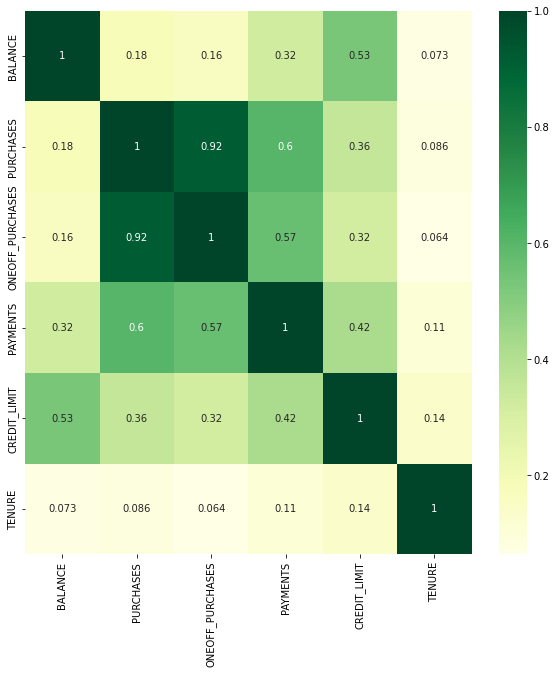

In [8]:
corr = df.corr()
cols = ['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'TENURE'];

# Figura
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(df[cols].corr(), annot = True, color = 'blue', cmap = 'YlGn');

# plt.xticks(rotation=45, ha='right');
# plt.yticks(rotation=0);

## 5. Ingeniería de variables

Se crearon nuevas variables derivadas para enriquecer el análisis:

- **Balance_to_Limit**: Ratio entre el saldo y el límite de crédito (uso del crédito).

- **Dominant_Purchase**: Tipo de compra predominante (única vs. en cuotas).

- **MinPay_ratio**: Relación entre pagos mínimos y saldo.

In [9]:
df['Balance_to_Limit'] = df['BALANCE'] / df['CREDIT_LIMIT']

Tipo de comportamiento dominante:

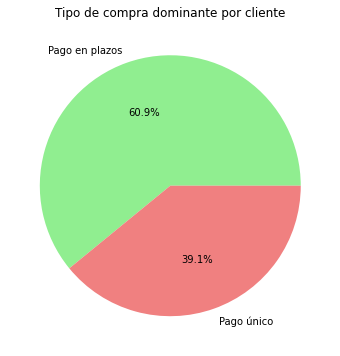

In [10]:
# Contar y graficar como pie chart
df['Dominant_Purchase'] = df.apply(lambda x: 'Pago único' if x['ONEOFF_PURCHASES'] > x['INSTALLMENTS_PURCHASES'] else 'Pago en plazos', axis=1)

df['Dominant_Purchase'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    labels=['Pago en plazos', 'Pago único'],  #orden
    ylabel='', 
    figsize=(6,6),
    title='Tipo de compra dominante por cliente')

plt.show()

## 6. Hallazgos relevantes (Insights)
1) ¿Qué porcentaje de clientes tiene un uso de crédito superior al 80%?

2) ¿Qué porcentaje de clientes gasta más en compras únicas?

3) ¿Hay relación entre pagos mínimos y clientes morosos?

### Insight 1: ¿Qué porcentaje de clientes tiene un uso de crédito superior al 80%?

Clientes con uso de crédito > 80%: 20.25%


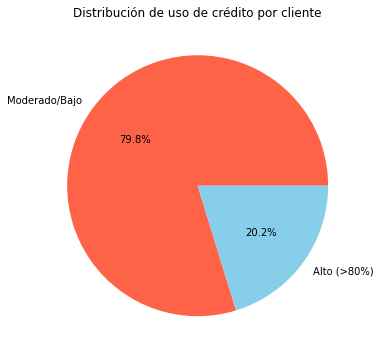

In [11]:
# Calcular columna y porcentaje
df['Balance_to_Limit'] = df['BALANCE'] / df['CREDIT_LIMIT']
high_usage = df[df['Balance_to_Limit'] > 0.8]
porcentaje_alto_uso = (len(high_usage) / len(df)) * 100
print(f"Clientes con uso de crédito > 80%: {porcentaje_alto_uso:.2f}%")

# Figura
plt.figure(figsize=(6,6))
df['Balance_to_Limit'].apply(lambda x: 'Alto (>80%)' if x > 0.8 else 'Moderado/Bajo')\
    .value_counts()\
    .plot.pie(autopct='%1.1f%%', colors=['tomato', 'skyblue'])
plt.title('Distribución de uso de crédito por cliente')
plt.ylabel('');

### Insight 2: ¿Qué perfil de cliente gasta más en compras únicas?

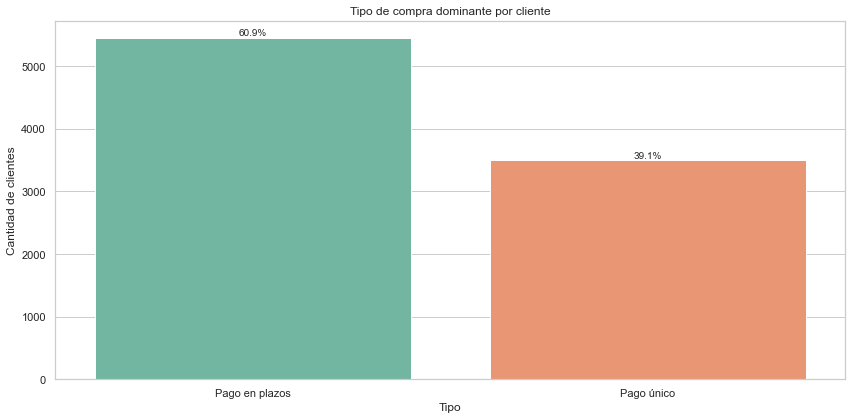

In [12]:
# Gráfico de barras
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Dominant_Purchase', data=df, palette='Set2')

# Título y etiquetas
plt.title('Tipo de compra dominante por cliente')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de clientes')

# Total de datos para calcular porcentajes
total = len(df)

# Agregar etiquetas con porcentajes encima de cada barra
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Insight 3: ¿Hay relación entre pagos mínimos y clientes morosos?

### ¿Qué es un cliente moroso potencial?

Un **cliente moroso potencial** puede definirse como aquel que:

- Tiene un **saldo mayor a 0** (es decir, tiene deuda),  
- Pero **no realiza pagos mínimos**, o **paga muy poco** (menos de un cierto porcentaje de su saldo).

---

#### Criterio utilizado (en código)

```python 
pot_morosos = (df['BALANCE'] > 0) & ((df['MINIMUM_PAYMENTS'].isna()) | (df['MINIMUM_PAYMENTS'] < 0.375 * df['BALANCE']))
```

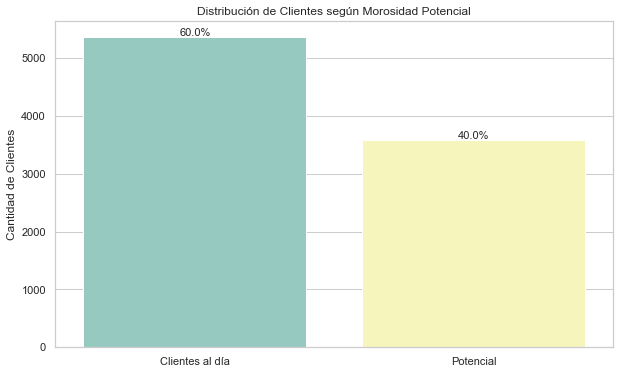

In [13]:
pot_morosos = (df['BALANCE'] > 0) & ((df['MINIMUM_PAYMENTS'].isna()) | (df['MINIMUM_PAYMENTS'] < 0.375 * df['BALANCE']))

# Creo variable categórica
df['Morosidad'] = pot_morosos.map({True: 'Potencial', False: 'Clientes al día'})

# Figura
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Morosidad', palette='Set3')
plt.title('Distribución de Clientes según Morosidad Potencial')
plt.xlabel('')
plt.ylabel('Cantidad de Clientes')

# Mostrar porcentaje de cada barra
for i, p in enumerate(df['Morosidad'].value_counts()):
    percentage = p / len(df) * 100
    plt.text(i, p + 10, f'{percentage:.1f}%', ha='center', fontsize=11)

plt.show()


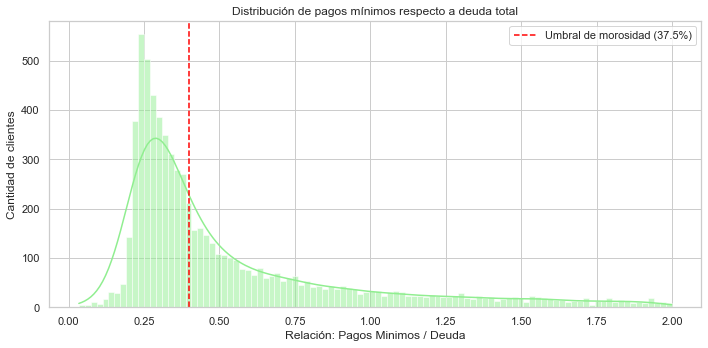

In [14]:
df['MinPay_ratio'] = df['MINIMUM_PAYMENTS'] / df['BALANCE']

# Se filtra solo los clientes con MinPay_ratio < 2.
filtered = df[df['MinPay_ratio'] < 2]

# Figura
plt.figure(figsize=(10, 5))
sns.histplot(filtered['MinPay_ratio'], bins=100, kde=True, color='lightgreen')
plt.axvline(0.4, color='red', linestyle='--', label='Umbral de morosidad (37.5%)')
plt.title('Distribución de pagos mínimos respecto a deuda total')
plt.xlabel('Relación: Pagos Minimos / Deuda')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Pipeline

### 7.1 Pre procesamiento de datos 
- ### Tratamiento de outliers

In [15]:
df_features = df.select_dtypes(include=np.number)
df_features = df_features.dropna()

columns = df_features.columns.to_list()
# Columnas completas para el tratamiento de datos
columns
#Solo las variables consideradas relevantes se trataran graficamente
cols = ['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'TENURE']

In [19]:
def outliers_plot(df, variable):
    plt.figure(figsize=(16, 3))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

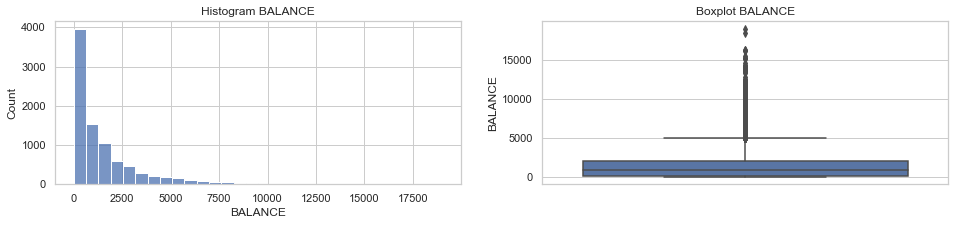

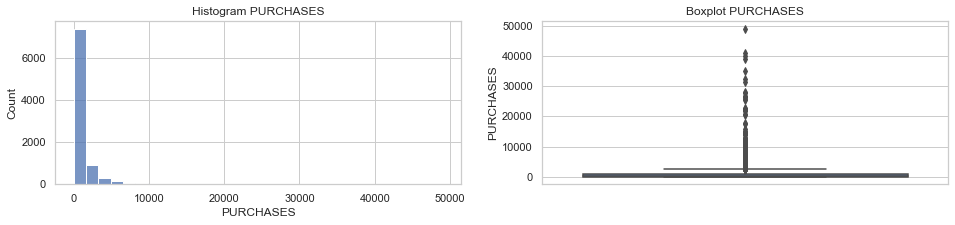

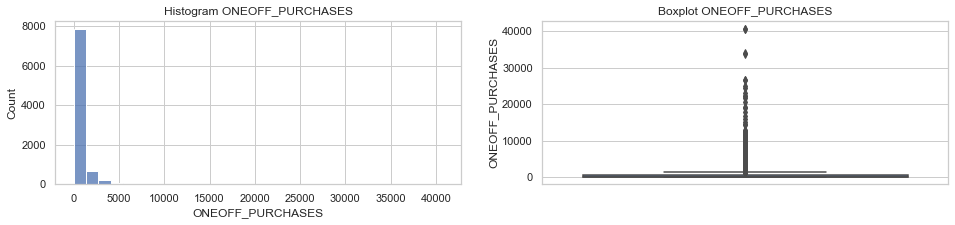

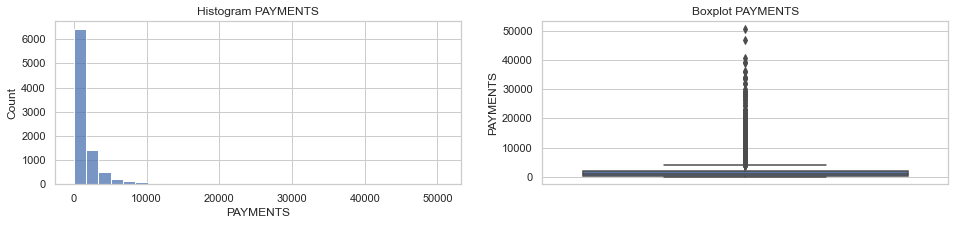

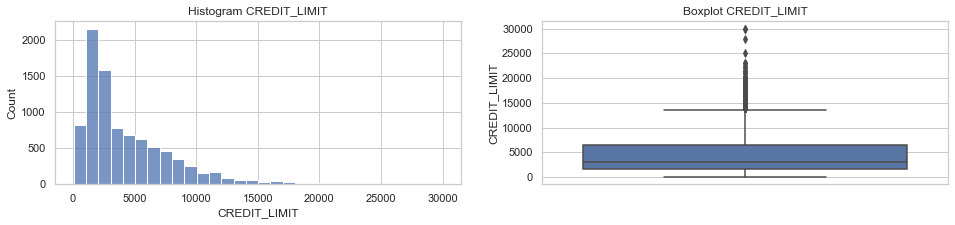

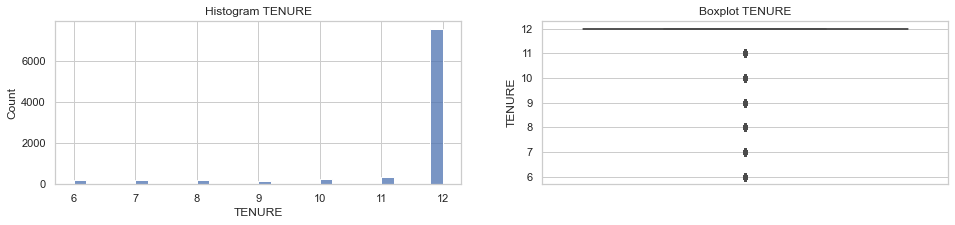

In [20]:
# Se grafica la distribucion de datos por columna para la revision de outliers, luego se procede a eliminarlos
for i in cols:
    outliers_plot(df_features, i)

In [21]:
# Función para eliminar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Crear una copia del dataset
df_filtered = df_features.copy()

# Eliminar outliers para cada columna
for col in columns:
    df_filtered = remove_outliers(df_filtered, col)
    
# for i in cols:
#     outliers_plot(df_filtered, i)

- ### Escalamiento de datos

In [22]:
# Escalamiento de datos
scaler = RobustScaler() #Robusto frente a outliers
df_scaled_array = scaler.fit_transform(df_filtered)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_filtered.columns, index=df_filtered.index)
assert not df_scaled.isnull().values.any(), "Hay valores NaN en df_scaled"
assert np.isfinite(df_scaled.values).all(), "Hay infinitos en df_scaled"

## 7.2 Análisis de componentes principales (PCA)

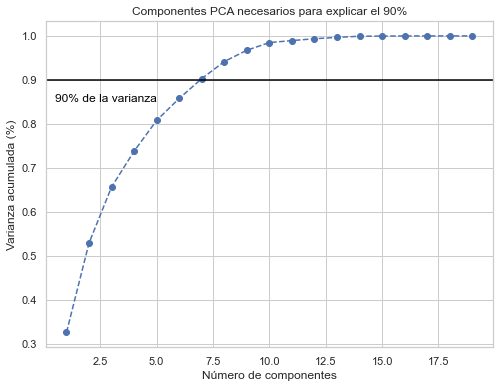

Son necesarios 7 componentes principales (PCA) para conservar el 90% de la información (varianza) del dataset original.


In [43]:
# Descripcion de la varianza deel dataset
# PCA
pca = PCA()
pca.fit(df_scaled)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

# Figura
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(cumsum)+1), cumsum, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='black', linestyle='-')
plt.text(0.5, 0.85, '90% de la varianza', color='black', fontsize=12)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada (%)')
plt.title('Componentes PCA necesarios para explicar el 90%')
plt.grid(True)
plt.show()

print(f"Son necesarios {d} componentes principales (PCA) para conservar el 90% de la información (varianza) del dataset original.")

## 7.3 Clustering

### 7.3.1 Metodo Elbow (Codo)

*Objetivo: Encontrar el número óptimo de clusters 𝑘.*
 

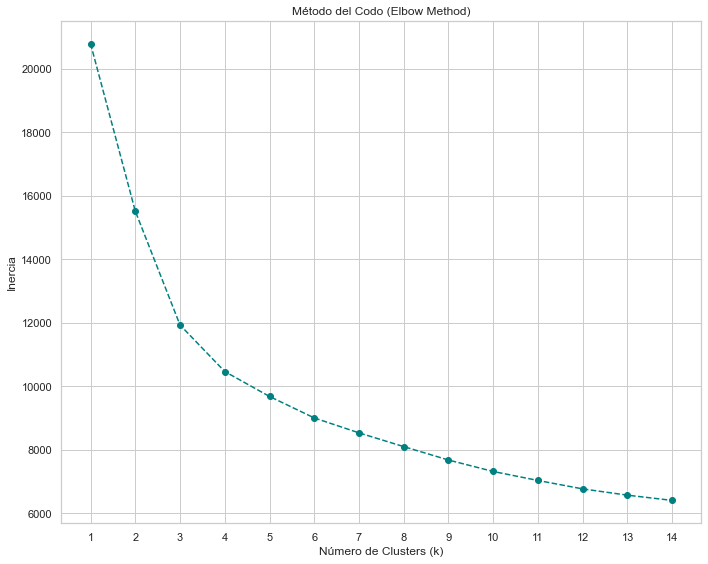

In [26]:
# Reducimos con PCA
pca = PCA(n_components=d)  # usá "d" componentes según lo anterior
df_pca = pca.fit_transform(df_scaled)

# Probar valores KMeans de k del 1 al 10
inertias = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# # Figura - "codo"
plt.figure(figsize=(10, 8))
plt.plot(k_range, inertias, marker='o', linestyle='--', color='teal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo (Elbow Method)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

El codo parece darse en 𝑘=3.

Con el fin de reforzar este análisis se procede a aplicar el metodo de la silueta (Silhouette Score) y David Bouldin score.

### 7.3.2 Método Silhouette Score y Davies Bouldin

In [27]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels,metric='euclidean')
    print(f'k={k} --> Silhouette Score: {score:.4f}')


k=2 --> Silhouette Score: 0.3085
k=3 --> Silhouette Score: 0.3009
k=4 --> Silhouette Score: 0.2210
k=5 --> Silhouette Score: 0.2193
k=6 --> Silhouette Score: 0.2094
k=7 --> Silhouette Score: 0.1782
k=8 --> Silhouette Score: 0.1800
k=9 --> Silhouette Score: 0.1857
k=10 --> Silhouette Score: 0.1890


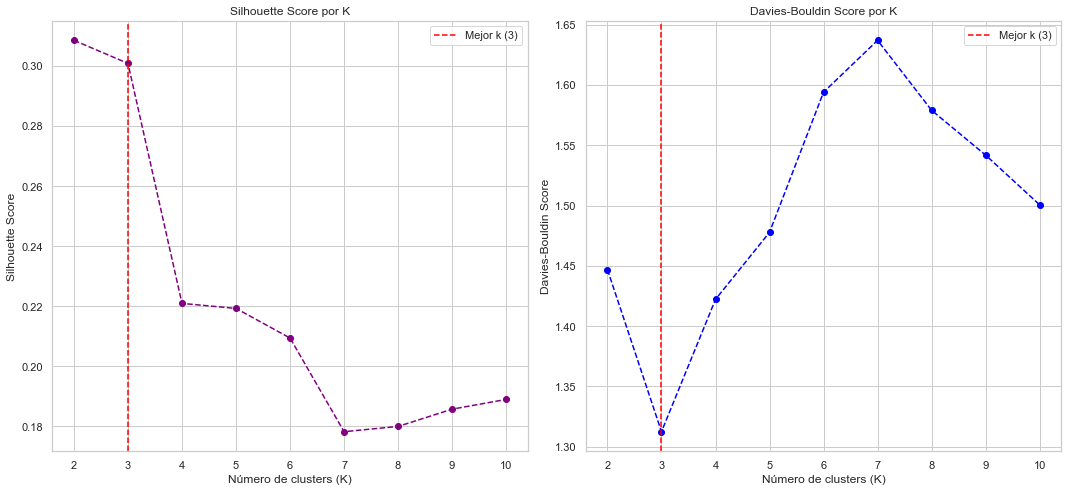

In [29]:
# Cálculo de métricas para diferentes K
k_values = range(2, 11)
silhouette_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))
    davies_scores.append(davies_bouldin_score(df_pca, labels))

# Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7));  # 1 fila, 2 columnas

# Gráfico Silhouette (izquierda)
ax1.plot(k_values, silhouette_scores, marker='o',linestyle='--', color='purple')
ax1.set_title('Silhouette Score por K')
ax1.set_xlabel('Número de clusters (K)')
ax1.set_ylabel('Silhouette Score')
ax1.axvline(x=3, color='red', linestyle='--', label='Mejor k (3)');
ax1.legend()
ax1.grid(True)

# Gráfico Davies-Bouldin (derecha)
ax2.plot(k_values, davies_scores, marker='o',linestyle='--', color='blue')
ax2.set_title('Davies-Bouldin Score por K')
ax2.set_xlabel('Número de clusters (K)')
ax2.set_ylabel('Davies-Bouldin Score')
ax2.axvline(x=3, color='red', linestyle='--', label='Mejor k (3)');
ax2.legend();
ax2.grid(True);

# Ajuste de layout y mostrar figura
plt.tight_layout();
plt.show();

### 7.3.3 K-Means

In [30]:
#Aplicar K-Means (k= 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [31]:
# PCA con 2 componentes solo para visualizar
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

In [32]:
# KMeans - ajustando k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_pca_2d)
centroids = kmeans.cluster_centers_

In [33]:
# Convertimos a DataFrame para facilitar el gráfico
df_plot = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])
df_plot['Cluster'] = labels

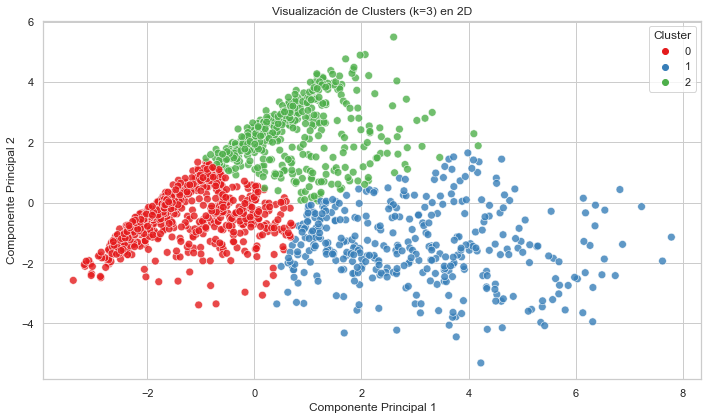

In [44]:
# Figura
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60, alpha=0.8)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=75, label='Centroides')
plt.title(f'Visualización de Clusters (k={k}) en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

- ### Boxplot variables / Cluster

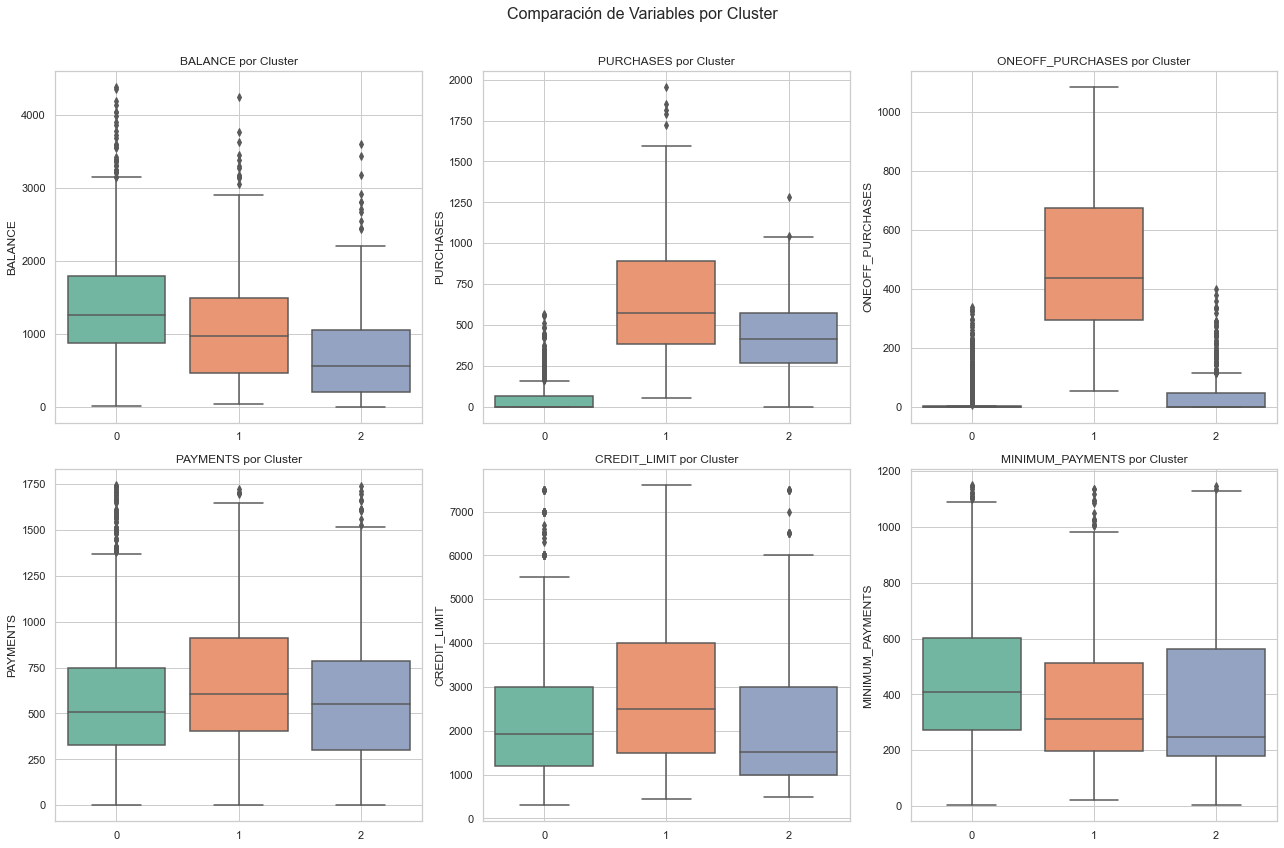

In [42]:
# Asignamos etiquetas de cluster al dataframe original
df_clustered = df_filtered.copy()
df_clustered['Cluster'] = labels

# Analizamos las medias de cada cluster
cluster_summary = df_clustered.groupby('Cluster').mean().round(2)

# Lista de columnas relevantes
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Figura
plt.figure(figsize=(18, 12))

# Loop para graficar cada variable
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='Set2')
    plt.title(f'{col} por Cluster')
    plt.xlabel('')
    plt.grid(True)

plt.suptitle('Comparación de Variables por Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## 8. Conclusion Final

### Análisis de Segmentación de Clientes - EDA & Clustering
<p align="justify"> El análisis exploratorio de datos (EDA) y el proceso de clustering aplicados al conjunto de datos de clientes de una fintech emisora de tarjetas de crédito han permitido identificar tres segmentos bien diferenciados. Cada grupo presenta patrones financieros y comportamientos de uso del crédito únicos, lo cual permite diseñar estrategias más eficaces de fidelización, riesgo y marketing. A continuación, se sintetizan las principales características de cada clúster, basadas en los boxplots de las variables <code>BALANCE</code>, <code>PURCHASES</code>, <code>ONEOFF_PURCHASES</code>, <code>PAYMENTS</code>, <code>CREDIT_LIMIT</code> y <code>MINIMUM_PAYMENTS</code>. </p>

--- 

🟢 Clúster 0 — Clientes de Baja Actividad con Saldos Moderados
<p align="justify"> <strong>Perfil:</strong> Clientes con saldos moderados (mediana ≈ 1500), escasa actividad de compras (medianas cercanas a 0) y pagos medios (750 en pagos generales y 500 en mínimos). Poseen límites de crédito intermedios (mediana ≈ 3000). </p> <p align="justify"> <strong>Interpretación:</strong> Usuarios de bajo compromiso, posiblemente orientados a gastos puntuales o emergencias. Representan una oportunidad para fomentar la recurrencia mediante promociones específicas o beneficios por uso frecuente. </p>

--- 
🟠 Clúster 1 — Clientes de Alta Actividad y Saldos Elevados
<p align="justify"> <strong>Perfil:</strong> Segmento con saldos altos (mediana ≈ 1750), elevado uso del crédito (compras totales ≈ 1000 y únicas ≈ 750), pagos altos (mediana ≈ 1000) y límites de crédito elevados (mediana ≈ 4000). </p> <p align="justify"> <strong>Interpretación:</strong> Clientes valiosos y comprometidos, candidatos ideales para servicios premium, programas de fidelización y mayores líneas de crédito. No obstante, requieren seguimiento por su mayor exposición al riesgo financiero. </p>

--- 
🔵 Clúster 2 — Clientes Conservadores con Saldos Bajos
<p align="justify"> <strong>Perfil:</strong> Usuarios con los saldos y límites de crédito más bajos (medianas ≈ 1000 y 2000 respectivamente), actividad de compras y pagos limitada (compras totales ≈ 500, únicas ≈ 250 y pagos ≈ 500). </p> <p align="justify"> <strong>Interpretación:</strong> Segmento conservador o en etapa inicial de vinculación con la fintech. Pueden beneficiarse de estrategias educativas o mejoras graduales en su línea de crédito para promover mayor confianza y compromiso. </p>

--- 
- **Conclusión**

<p align="justify"> Este análisis permite a la organización tomar decisiones basadas en datos, adaptando su oferta de productos financieros y estrategias de contacto según las características de cada segmento. La correcta segmentación de clientes no solo mejora la experiencia del usuario, sino que también optimiza el control de riesgos y la rentabilidad del negocio. </p>

- **Implicaciones Estratégicas**
<p align="justify"> Los resultados del clustering ofrecen una base sólida para la toma de decisiones estratégicas en la fintech:</p>
    
   - Marketing Personalizado: La comprensión de los perfiles permite diseñar campañas específicas. Por ejemplo, el Clúster 1 podría recibir ofertas de productos premium, mientras que el Clúster 0 podría ser incentivado con promociones para aumentar su actividad de compra.

   - Gestión de Riesgos: El Clúster 1, con mayores saldos y pagos, requiere un seguimiento más cercano para mitigar riesgos crediticios, mientras que el Clúster 2, con un comportamiento conservador, implica un riesgo menor.

   - Desarrollo de Productos: Las necesidades de cada grupo sugieren oportunidades para nuevos productos, como herramientas de incentivo para el Clúster 0 o recursos educativos para el Clúster 2.

<p align="justify">En resumen, este análisis ha segmentado con éxito la base de clientes en tres grupos diferenciados: clientes de alta actividad (Clúster 1), clientes de baja actividad (Clúster 0) y clientes conservadores (Clúster 2). Estas conclusiones proporcionan a la fintech una guía clara para optimizar sus estrategias de marketing, gestión de riesgos y desarrollo de productos, mejorando así la satisfacción del cliente y el desempeño general del negocio.</p>